In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# фиксируем seed для воспроизводимости результатов
random_state = 42

# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [75]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

Взял код из семинара:

In [76]:
mnist = fetch_openml("mnist_784")

digits = datasets.load_digits()

n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

Делим данные на тренировочную выборку и тестовую:

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)

Напишем функцию, возвращающую точность модели на тренировочной и тестовой выборке для евклидовой метрики:

In [78]:
def get_accuracy_l2(k, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=k, algorithm='brute')

    model.fit(X_train, y_train)


    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)


    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    return accuracy_test, accuracy_train


Построим график зависимости точности модели от значения параметра $k$ для тестовой и обучающей выборки:

Text(0.5, 1.0, 'Зависимость метрики качества от значения гиперпараметра k')

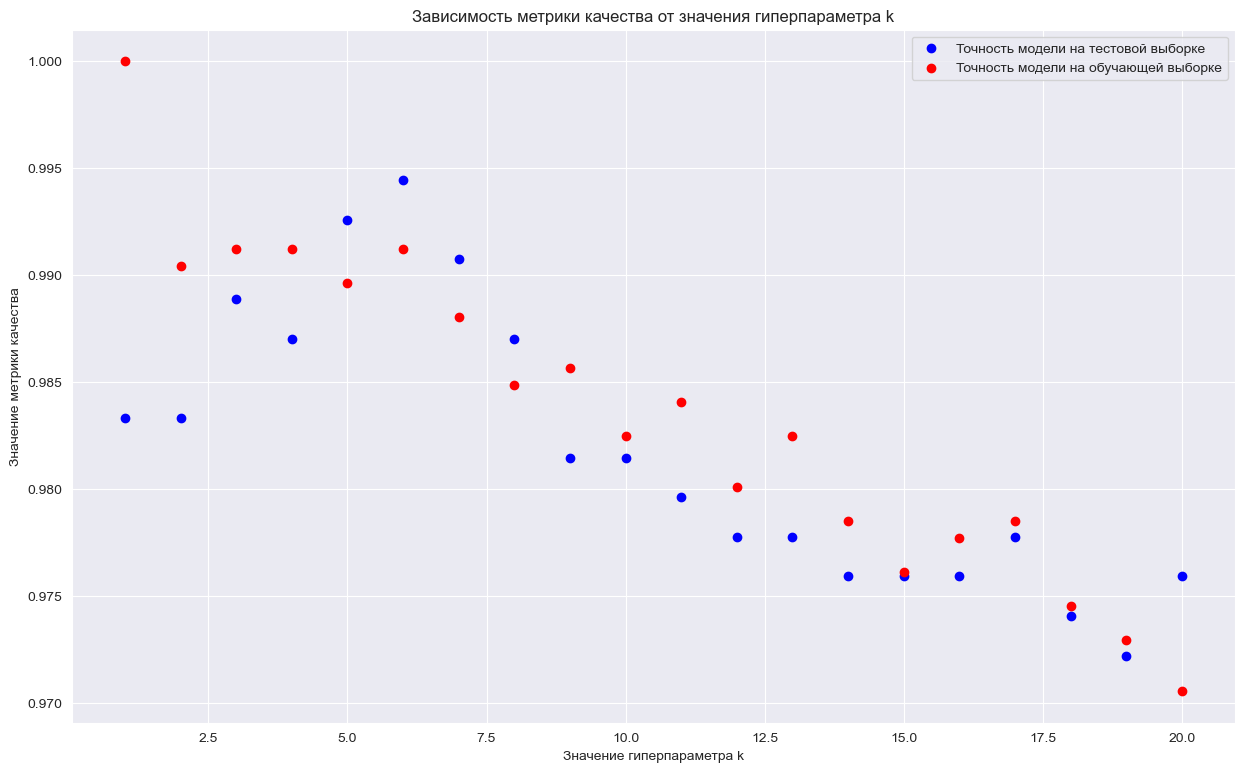

In [79]:
fig = plt.figure(figsize=(15, 9))

for i in range(1, 21):
    acc = get_accuracy_l2(i, X_train, X_test, y_train, y_test)
    plt.scatter(i, acc[0], color='blue')
    plt.scatter(i, acc[1], color='red')

plt.xlabel('Значение гиперпараметра k')
plt.ylabel('Значение метрики качества')
plt.legend(['Точность модели на тестовой выборке', 'Точность модели на обучающей выборке'])
plt.title('Зависимость метрики качества от значения гиперпараметра k')

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** Дело в том, что при обучении наша модель запоминает метки класса объектов тренировочной выборки. Затем, при дальнейшем угадывании на какой-либо другой выборке наша модель ищет $k$ ближайших соседей из тренировочной выборки и смотрит, какой класс популярнее среди них. При угадывании меток класса на тренировочной выборке при значении $k = 1$ ближайшим объектом из тренировочной выборки будет тот же объект, для которого ищем соседей, поэтому точность и будет 100%

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

Напишем функцию, возвращающую точность модели на тренировочной и тестовой выборке(манхэттенское расстояние):

In [80]:
def get_accuracy_l1(k, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='manhattan')

    model.fit(X_train, y_train)


    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)


    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    return accuracy_test, accuracy_train


Построим график:

Text(0.5, 1.0, 'Зависимость метрики качества от значения гиперпараметра k')

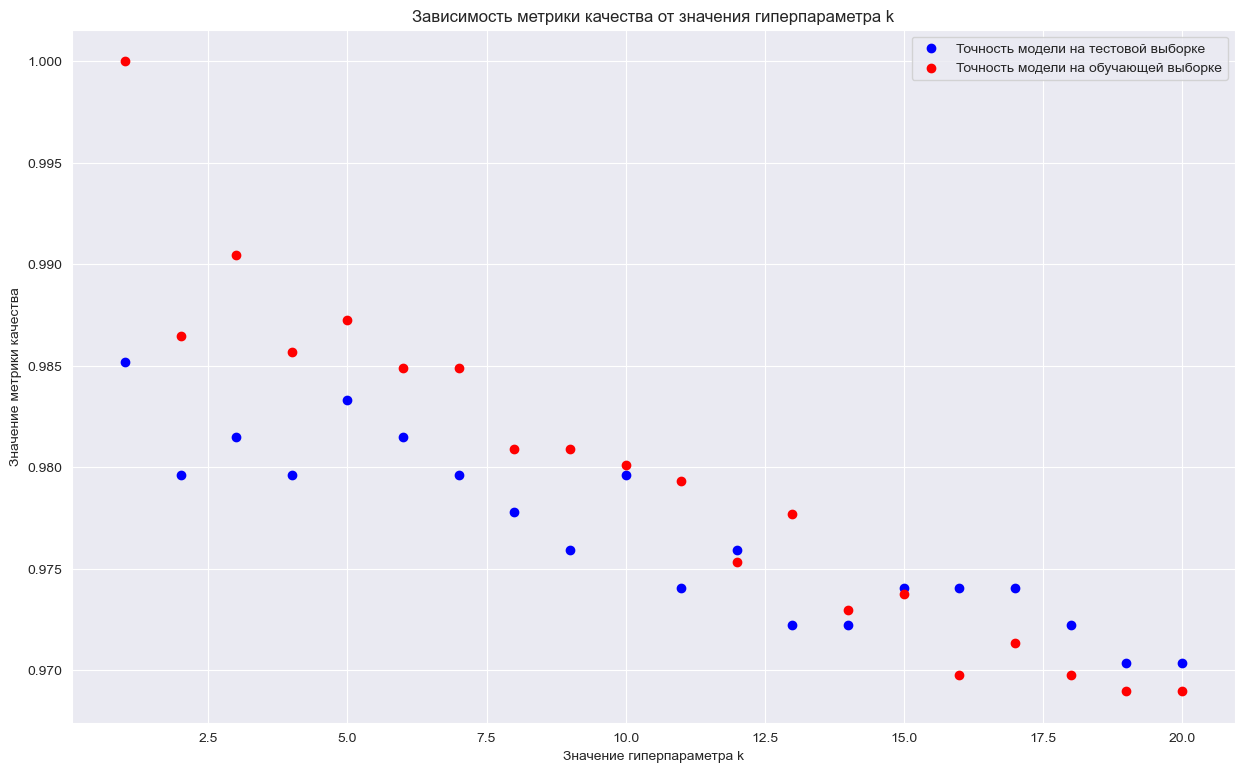

In [81]:
fig = plt.figure(figsize=(15, 9))

for i in range(1, 21):
    acc = get_accuracy_l1(i, X_train, X_test, y_train, y_test)
    plt.scatter(i, acc[0], color='blue')
    plt.scatter(i, acc[1], color='red')

plt.xlabel('Значение гиперпараметра k')
plt.ylabel('Значение метрики качества')
plt.legend(['Точность модели на тестовой выборке', 'Точность модели на обучающей выборке'])
plt.title('Зависимость метрики качества от значения гиперпараметра k')

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** Из графика видно, что точность модели упала. Я думаю, дело в том, что метрика $L_2$ мягче реагирует на небольшое изменение формы цифр, в отличие от метрики $L_1$ Метрику $L_1$ было бы разумнее брать, если бы разброс данных был намного сильнее

**Выводы:** Из проделанной работы видно, что модель выдает наилучший результат с Евклидовой метрикой и значением параметра $k = 6$. Выбор метрики влияет на точность модели, причем достаточно заметно. Это хорошо видно, если сравнить первый и второй график. Также достаточно заметно влияет значение гиперпараметра $k$, что можно увидеть, как и на первом, так и на втором графике. Из этого всего можно сделать вывод, что подбор гиперпараметров важная задача для повышения точности модели

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [82]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [83]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [84]:
len_before = len(X)
X = X.dropna()
y=y[X.index]

print(len_before - len(X))

177


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)

Создадим этот df для удобства в следующем задании:

In [86]:
X_train_new = X_train.merge(y_train, left_index=True, right_index=True, how='inner')

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

Посмотрим, построив гистограмму, какая доля мужчин и женщин выжила при катастрофе

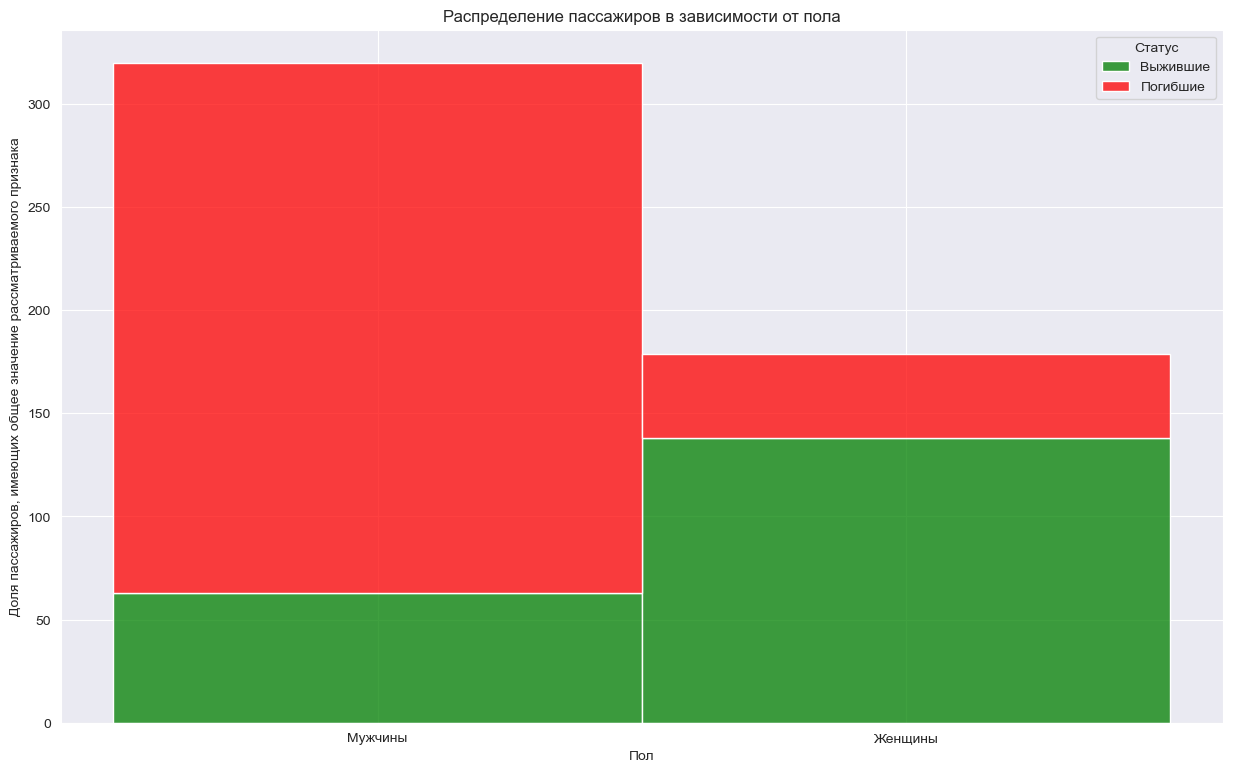

In [87]:
fig = plt.figure(figsize=(15, 9))

sns.set_style('darkgrid')

ax = sns.histplot(
    data=X_train_new, 
    bins=2, 
    x='Sex', 
    hue='Survived', 
    palette={0: "red", 1: "green"}, 
    multiple='stack'
)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Мужчины', 'Женщины'])

plt.title('Распределение пассажиров в зависимости от пола')
plt.legend(title='Статус', labels=['Выжившие', 'Погибшие'])
plt.xlabel('Пол')
plt.ylabel('Доля пассажиров, имеющих общее значение рассматриваемого признака')

plt.show()

Из гистограммы видно, что большая часть женщин выжила в катастрофе. Решающим условием для дерева глубины 1 может быть пол, так как малое количество мужчин выжило, в то время как у женщин наоборот.

Далее будем исследовать, какие признаки сильнее влияли на выживаемость пассажиров. Так как у нас больше погибших, то будем пытаться придумать правило, максимизирующее правильное угадывание выживших (не в ущерб вычисления погибшим). Поэтому будем интересоваться диапазонами гистограмм, где суммарный размер зеленой части превышает красную.

Построим зависимость от класса пассажирского билета:

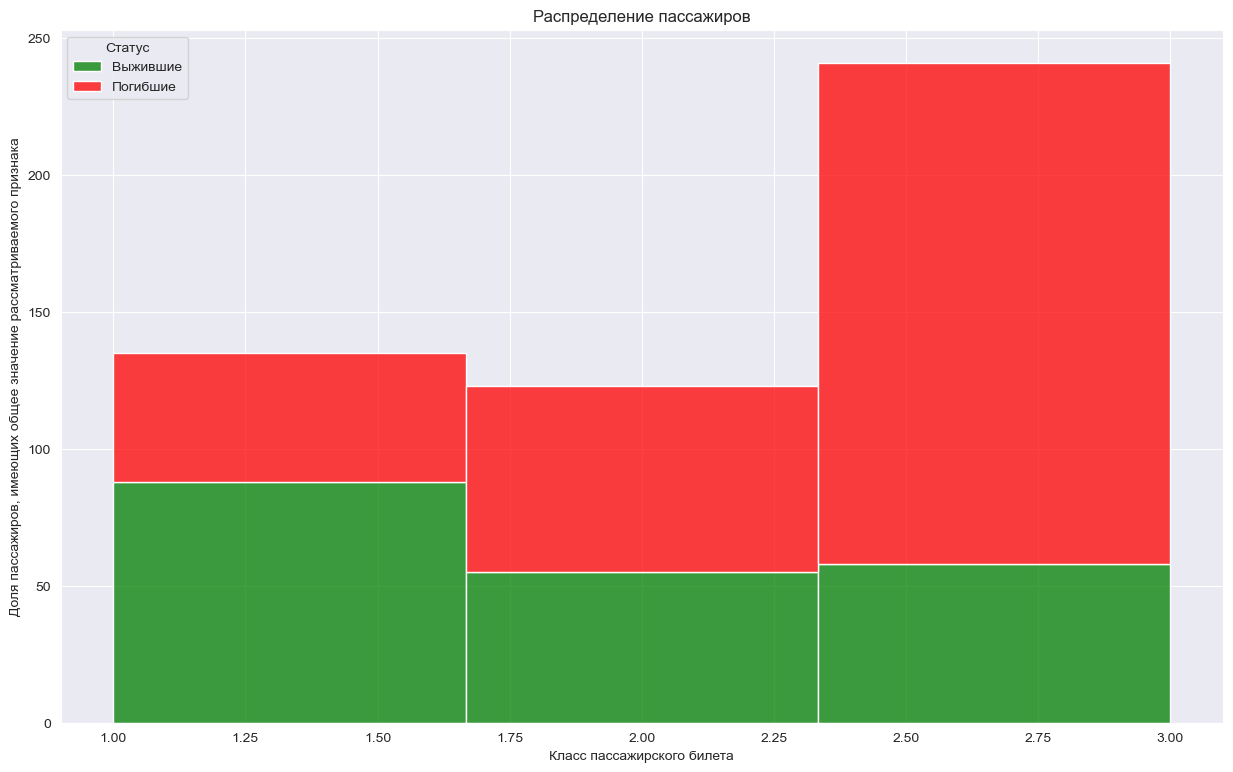

In [88]:
fig = plt.figure(figsize=(15, 9))

sns.set_style('darkgrid')

ax = sns.histplot(
    data=X_train_new, 
    bins=3, 
    x='Pclass', 
    hue='Survived', 
    palette={0: "red", 1: "green"}, 
    multiple='stack'
)


plt.title('Распределение пассажиров')
plt.legend(title='Статус', labels=['Выжившие', 'Погибшие'])
plt.ylabel('Доля пассажиров, имеющих общее значение рассматриваемого признака')
plt.xlabel('Класс пассажирского билета')

plt.show()

Из распределения видно, доля выживших в первом классе больше половины, в то время как во втором и третьем - нет. Поэтому в рамках модели будем считать, что все пассажиры 1 класса выжили.

Построим распределение пассажиров 1 класса по возрасту:

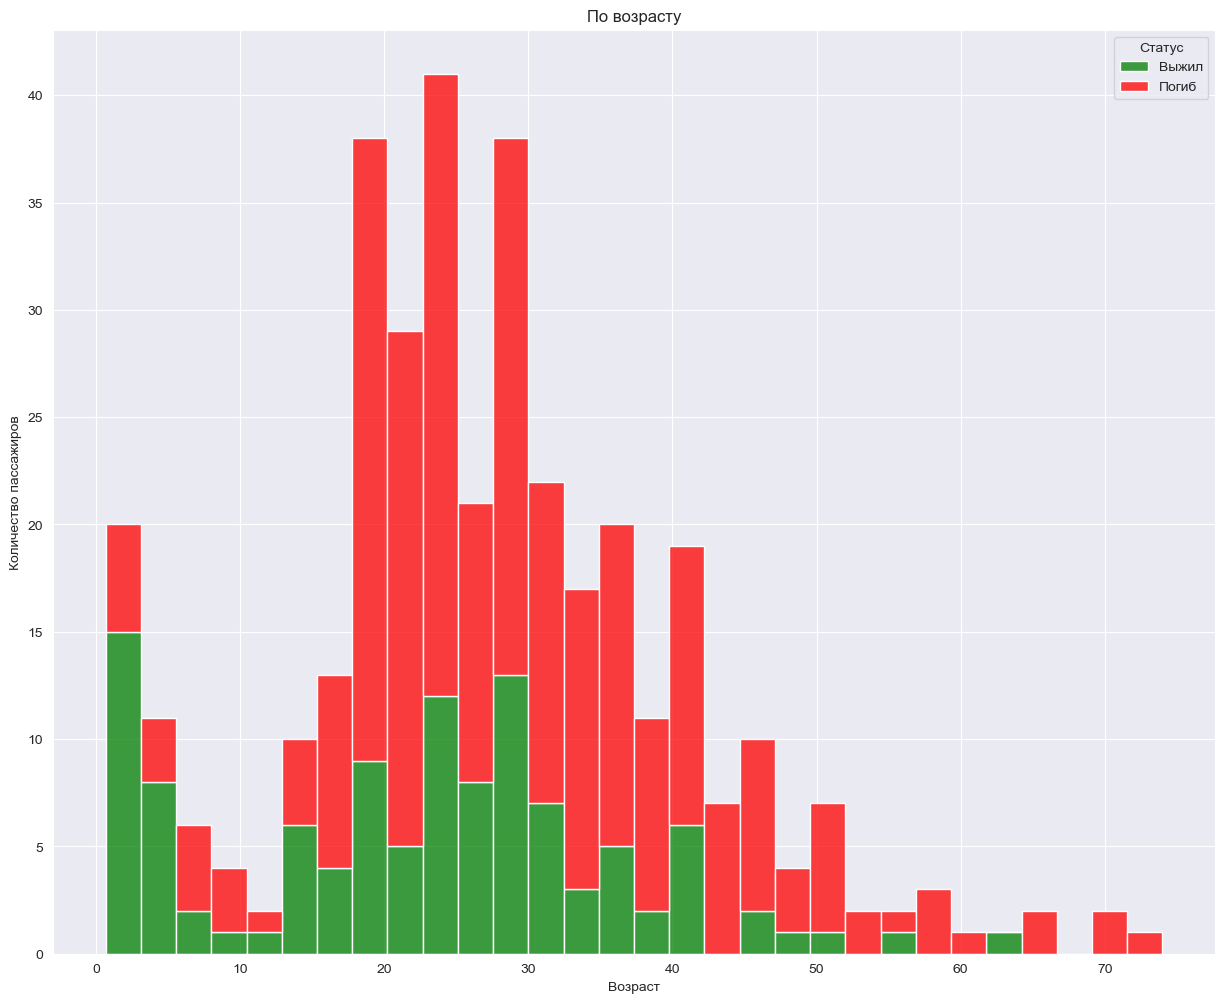

In [89]:
fig = plt.figure(figsize=(15, 12))

sns.histplot(
    data=X_train_new[(X_train_new['Pclass'] != 1)], 
    bins=30, 
    x='Age', 
    hue='Survived', 
    palette={0: "red", 1: "green"}, 
    multiple='stack',
)

plt.title('По возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend(title='Статус', labels=['Выжил', 'Погиб'])

Мы ищем диапазоны в колонках, где суммарная зеленая часть больше красной. На гистограмме возраста видно, что превосходящая часть пассажиров с $Age$ < 15 выжила. Остальных таких участков очень мало, а те, что есть - незначительны. Возьмем это 2-ым условием для дерева глубины 2.

##### <!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

Правило:

Если пол пассажира male, то он погиб.
Если пол пассажира female, то она выжила.

Пояснение: На основе визуализации, мы видим, что среди пассажиров мужского пола (male), большинство погибло (графики показывают, что больше мужчин в категории "погиб"), в то время как среди женщин (female) наблюдается больше выживших (графики показывают, что больше женщин в категории "выжил").


**Дерево 2:**

Правило:

Если класс билета Pclass = 1, то пассажир выжил.
Если класс билета Pclass = 2 или Pclass = 3, переходим ко второму уровню:
Если возраст пассажира меньше 15 лет, то пассажир выжил.
В остальных случаях пассажир погиб.

Пояснение:
Это дерево было выведено на основе анализа графиков, на которых видно, что доля выживших превышала 50% в определенных случаях.

Первый уровень дерева проверяет класс билета:
Если Pclass = 1, большинство пассажиров выжили, и это логика подтверждается графиками.
Если Pclass = 2 или Pclass = 3, переходим ко второму уровню, так как в этих классах выживаемость распределена более разнообразно.
Второй уровень анализирует возраст:
На основе графиков, я заметил, что молодые пассажиры (меньше 15 лет) чаще выживали. Это правило было установлено после анализа, где доля выживших в этой группе была больше 50%.
В остальных случаях, когда этих условий нет, пассажиры, скорее всего, погибали.
Таким образом, дерево основано на визуальном анализе графиков, где доля выживших была больше 50% при соблюдении определённых условий (возраст).

###### Реализуйте полученные деревья по шаблону

Дерево 1:

In [90]:
def tree(features: pd.DataFrame) -> pd.Series:
    predicted = features.apply(
        lambda features: 1 if features['Sex'] == 'female' else 0, axis=1
    )
    return predicted

In [91]:
def secondtree(features: pd.DataFrame) -> pd.Series:
    predicted = features.apply(
        lambda features: 1 if ((features['Age'] < 15 & features['Pclass'] != 1) or features['Pclass'] == 1) else 0, axis=1
    )
    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [92]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:

    return  (predicted == target).sum() / len(target)

Посмотрим, какие результаты получились:

In [93]:
print(accuracy(y_test, tree(X_test)), accuracy(y_test, secondtree(X_test)))

0.7534883720930232 0.6604651162790698


Видно, что в случае дерева глубины 1 точность 75%.
В случае дерева глубины 2 точность 66%.
Далее сравним с KNN

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** Проблема в том, что признаки 'SibSp', 'Parch', 'Pclass', 'Sex'(если 'female' - 0, а 'male' - 1) принимают значения значительно меньшие, чем значения признака 'Fare'. Поэтому при обучении методом KNN перечисленные признаки почти не будут влиять на результат, т.к основной вклад в расстояние дает 'Fare'. Да, для 'Pclass' имеется эта же проблема

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




Для начала нам необходимо в колонке 'Sex' заменить 'female' на 0, а 'male' на 1 (так как мы работаем с расстояниями):

In [94]:
X_test.loc[X_test['Sex'] == 'female', 'Sex'] = 0
X_test.loc[X_test['Sex'] == 'male', 'Sex'] = 1


X_train.loc[X_train['Sex'] == 'female', 'Sex'] = 0
X_train.loc[X_train['Sex'] == 'male', 'Sex'] = 1

Теперь удалим из таблиц лишние столбцы 'SibSp' и 'Parch', так как в данной задаче эти признаки нас не интересуют

In [95]:
X_test.drop(columns=['SibSp', 'Parch'], inplace=True)
X_train.drop(columns=['SibSp', 'Parch'], inplace=True)

Обучаем модель и высчитываем точность:

In [96]:
model = KNeighborsClassifier(n_neighbors=4, algorithm='brute')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6837209302325581

Получаем точность 68%. Сравнивая с предыдущим методом, можем сказать, что эта модель менее точная (если сравнивать с лучшим результатом прошлого метода, то там точность 75%). Отсюда можно сделать вывод, что модель, основанная на интуитивном анализе графиков может быть точнее, чем бездумное применение KNN. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [97]:
print(X_train.min(), X_train.max())

Pclass       1
Age       0.67
Sex          0
Fare       0.0
dtype: object Pclass        3
Age        80.0
Sex           1
Fare      263.0
dtype: object


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  Влияет так, что различие признаков 'Pclass' и 'Sex' почти не влияет на подсчет расстояний, ведь 'Fare' на несколько порядков больше. 


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** В силу того, что признаки приводятся к единому масштабу независимо друг от друга, может получиться так, что изначально ближе расположенная точка А к точке С, может стать более удаленной, чем точка B при применении этого преобразования, а это, безусловно, влияет на результаты работы нашей модели. Также есть значительный минус, что нормализация резко влияет на выбросы. Т.е если максимальное значение сильно больше других, то после нормализации точки сильно сожмутся

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [98]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [99]:
print(scaled_X_train.min(), scaled_X_train.max())

0.0 1.0


Для тренировочных данных теперь все значения лежат в диапазоне от 0 до 1 (независимо от столбца). Для тренировочных нет, но тоже отнормированы. Такое произошло, потому что нормализация происходила по максимальным и минимальным значениям тренировочной выборки.

Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [100]:
model = KNeighborsClassifier(n_neighbors=4, algorithm='brute')


model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7906976744186046

**Вывод:** Видно, что при одних и тех же значениях гиперпараметра $k$ наша модель выдает более точные предсказания. Можно сделать вывод, что нормализация достаточно сильно влияет на работу модели

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

Text(0.5, 1.0, 'Зависимость метрики качества от значения гиперпараметра k')

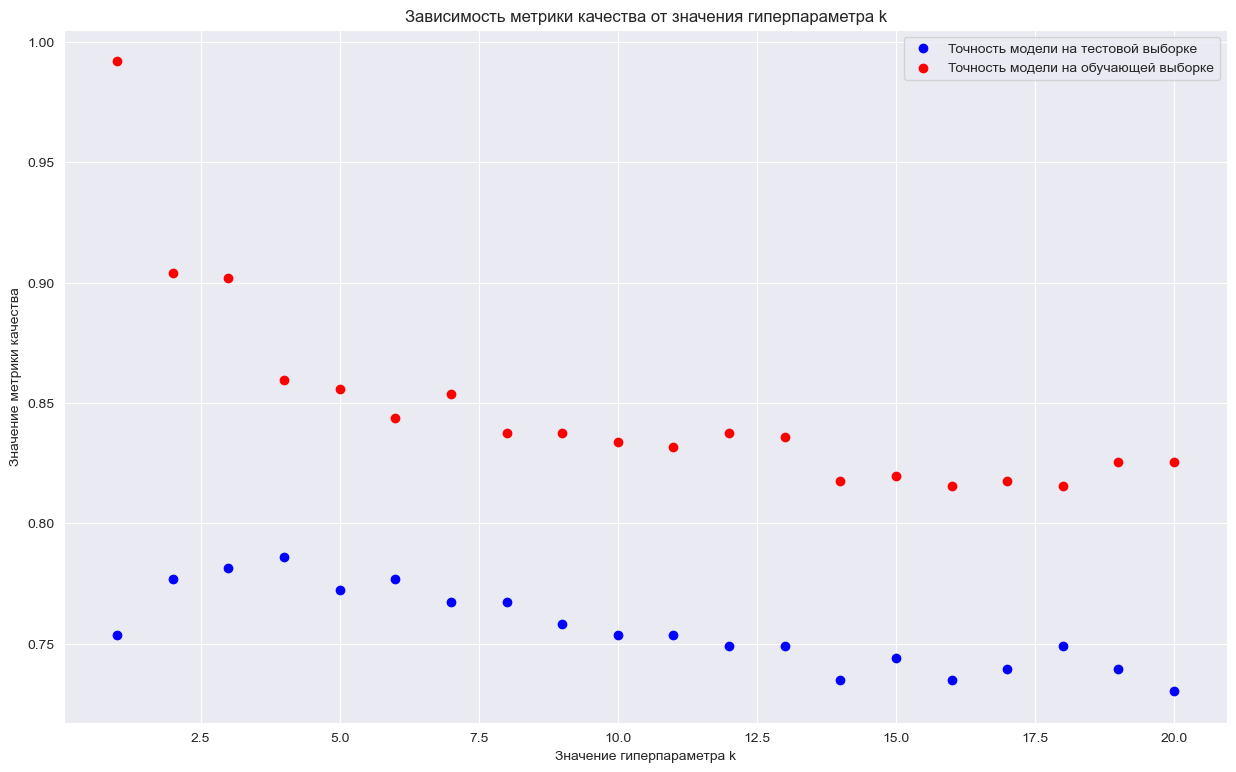

In [101]:
fig = plt.figure(figsize=(15, 9))

for i in range(1, 21):
    acc = get_accuracy_l1(i, scaled_X_train, scaled_X_test, y_train, y_test)
    plt.scatter(i, acc[0], color='blue')
    plt.scatter(i, acc[1], color='red')

plt.xlabel('Значение гиперпараметра k')
plt.ylabel('Значение метрики качества')
plt.legend(['Точность модели на тестовой выборке', 'Точность модели на обучающей выборке'])
plt.title('Зависимость метрики качества от значения гиперпараметра k')

**Вывод:**
1. Максимальная точность на тестовой выборке - 79% и достигается она при значении гиперпараметра $k$ = 4.
2. Порой данные могут быть распределены в совсем разных по порядку диапазонах, и для того, чтобы не портить работу KNN и правильно учитывать соотношения параметров, есть смысл использовать некоторое преобразование. В нашем случае преобразованием было - минимаксная нормализация. В итоге мы получили, что с нормированными данными наша модель работает точнее
3. Ранее мы проделали наивный визуальный анализ данных и придумали на этой основе свою модель. Было потрачено больше усилий и времени на реализацию того метода, и в итоге мы получили точность лучше, чем с помощью "бездумного" KNN, но хуже, чем с помощью более "обдуманного" KNN. Из этого можно сделать вывод, что неправильно обдумав обращение с данными, по итогу можно получить результат хуже наивного анализа графиков.